# Spam Detector

# Email Spam Detection: Exploratory Data Analysis

## Project Overview
This notebook presents a comprehensive exploratory data analysis of email data for spam detection. Using the Enron spam dataset, I analyze over 33,000 emails to identify patterns that distinguish spam from legitimate emails (ham).
Dataset

I will be using the enron spam data from: https://github.com/MWiechmann/enron_spam_data/tree/master

- This is a single labled CSV file that has 33716 rows.
- The Spam/Ham distribution is almost evenly distributed: spam = 17171 and ham = 16545
- Key features: Subject line, message body, date, and spam/ham label

This dataset provides an excellent foundation for spam detection analysis due to its size, balance, and real-world origin from the Enron email corpus.

## Objectives
This exploratory analysis aims to:
- Clean and prepare the data by handling missing values, duplicates, and inconsistencies
- Engineer meaningful features including day of week and email repetition frequency
- Identify linguistic patterns that distinguish spam from legitimate emails
- Visualize key differences between spam and ham using word clouds and frequency analysis
- Create a processed dataset ready for machine learning model development

## Key Questions
Throughout this analysis, I address:
- What are the most common words and phrases in spam versus ham emails?
- How do structural patterns (missing subjects, duplicates, timing) differ between email types?
- What features can be engineered to improve spam detection accuracy?
- What patterns emerge in email distribution?

## Methodology

- Data loading and initial inspection
- Missing value and duplicate handling
- Feature engineering where two feaatures were engineered:  
  * day_of_week: 0 for monday to 6 for sunday
  * frequency: the frequency of the email
- Text preprocessing (tokenization, stopword removal, lowercase conversion)
- Visual analysis using word clouds and bar charts
- Statistical comparison of spam and ham characteristics

## Results
- Most spam emails were sent on Tuesday
- Legitimate emails numbers decrease drumatically on the weekend than do spam emails
- Higher numbers of emails repeatedly sent 2, 3, 4 and 5 times for spam emails, whereas most ham emails were sent only once
- Spam emails can have a missing subject
  
**Top Spam Indicators**
From the word cloud and frequency analysis of spam emails, the most common words include:

- Commercial/marketing terms: "click", "free", "offer", "money", "business"
- Urgency words: "now", "today", "limited"
- Verbs that requires immediate action or immediate response
- Financial terms: References to money, deals, and opportunities

**Top Ham Indicators**
From the ham email analysis, the most common words include:

- Work related terms that are company specific: "enron", "meeting", "energy" 
- Communication words: "email", "message", "subject"
- Time references: "time", "day", "week"
- Words suggesting normal business correspondence
- Personal pronouns: "thanks", "please" that indicate genuine human interaction

---
This notebook sets the foundation for building a robust spam detection model by thoroughly understanding the data and identifying the most distinguishing features between spam and legitimate emails.
---

run in virtual env 'spam_detector_env'
1. Load Data from: https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

- I will be using the `enron spam data` from: https://github.com/MWiechmann/enron_spam_data/tree/master
    - This is a single labled CSV file that has 33716 rows.
    - The Spam/Ham distribution is almost evenly distributed: spam = 17171 and ham = 16545
3. Clean data:
    * Check for missing values and duplicates and handling them
    * Drop unnecessary columns
    * Encoding Target variable
2. EDA:
    create a:
        *pie plot of spam to ham emails
        
3. Text processing  
   * convert text to lowercase,   
   * tokenize the sentences,   
   * remove special characters, stopwords, and punctuation.  
   
5. use wordcloud to print the words that appear the most in spam and in ham emails
6. Print a bar graph of the top 30 words used in spma and in ham emails


## Load Data

In [14]:
!which python

/Users/Rime/anaconda3/bin/python


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
import re
from sklearn.model_selection import train_test_split

#disable warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/Rime/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#import libraries
from nltk import word_tokenize, sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from string import punctuation
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /Users/Rime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#set the correct path to the notebook
from pathlib import Path

notebook_path = Path.cwd()
parent_dir = Path.cwd().parent
data_path = parent_dir/"data"

### Import Data

In [18]:
raw_emails = pd.read_csv(data_path/'raw_data.csv')
assert raw_emails.shape[0] > 0, 'Data not imported'
assert raw_emails.shape[1] == 5, 'Missing columns'


In [19]:
print(f'Data set shape: {raw_emails.shape}')
print(f'Columns names: {raw_emails.columns.tolist()}')
val_counts = raw_emails['Spam/Ham'].value_counts()
print(f'Distribution of labels: {val_counts}')

Data set shape: (33716, 5)
Columns names: ['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date']
Distribution of labels: Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64


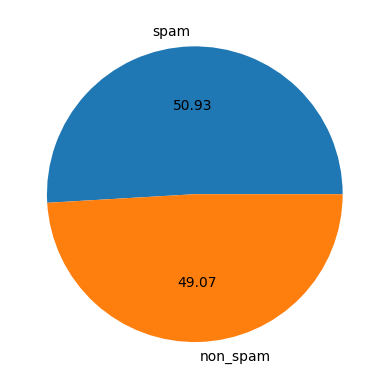

In [20]:
#pie plot
plt.pie(raw_emails['Spam/Ham'].value_counts(), labels=['spam','non_spam'], autopct = '%0.2f');

In [21]:
print('Sample data:' )
raw_emails.head()

Sample data:


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [22]:
print('Column information:')
raw_emails.info()

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


- Save raw emails

In [23]:
raw_emails.to_csv('data/raw_data.csv', index=False)

## Test set

- Separate the test and save it before any processing is done on the data to avoid data leakage

In [24]:
X = raw_emails.drop('Spam/Ham', axis=1)
y = raw_emails['Spam/Ham']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size=0.2,random_state=42) 
#stratify=y tells scikit-learn to split the data so that the proportion of each class in y is the same in both train and test sets.
print(f'Size of X_train = {X_train.shape}, \nsize of X_test = {X_test.shape}\
, \nsize of y_train = {y_train.shape}, \nsize of y_test = {y_test.shape}')

Size of X_train = (26972, 4), 
size of X_test = (6744, 4), 
size of y_train = (26972,), 
size of y_test = (6744,)


In [25]:
#Save the test set
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)
X_train.to_csv('data/X_train.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)

## Exploratory Data Analysis

In [26]:
#Combine the y back in the data and name it Label
emails = X_train.copy()
emails['Label'] = y_train
print(f'size of the combined training data = {emails.shape}')

size of the combined training data = (26972, 5)


- Pie plot number of spam to ham

In [27]:
emails['Label'].value_counts()

Label
spam    13736
ham     13236
Name: count, dtype: int64

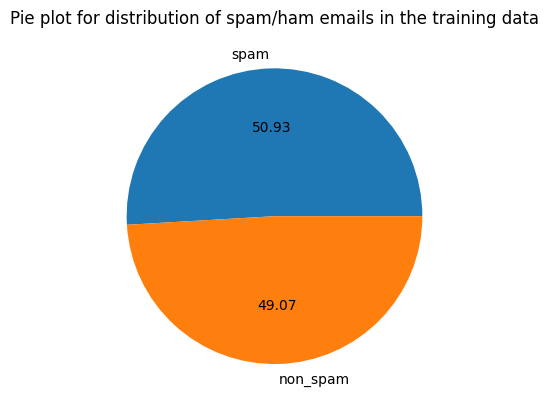

In [28]:
#pie plot
plt.pie(emails['Label'].value_counts(), labels=['spam','non_spam'], autopct = '%0.2f')
plt.title('Pie plot for distribution of spam/ham emails in the training data');

In [29]:
emails.head(2)

,Message ID,Subject,Message,Date,Label
14759,14759,resignations and estate,"louise ,\nin the event that some of the people...",2002-01-15,ham
28773,28773,etc - 2001 museum of fine arts membership drive,please see attached . if you have any question...,2001-08-16,ham


In [30]:
#check for missing and duplicates
print(f'Missing values by columns:\n{emails.isna().sum()}')
for col in emails.columns:
    print(f'\nNumber of duplicates for {col}:{emails[col].duplicated().sum()}')

Missing values by columns:
Message ID      0
Subject       226
Message       297
Date            0
Label           0
dtype: int64

Number of duplicates for Message ID:0

Number of duplicates for Subject:6845

Number of duplicates for Message:2642

Number of duplicates for Date:25466

Number of duplicates for Label:26970


### Missing values

- There are a few missing values, it is important to deal since they contain the text needed for spam detection
- Check if there are emails with missing subject
- If there are are they mostly for spam or ham emails
- Check if there are any emails with subject that is an empty string
- Check if there are any emails with message that is an empty string
- Check if there are any emails with both subject and message are missing

In [94]:
#print('number of subject with missing string = ', emails['Subject'].isnull().sum())
miss_subj = emails[emails['Subject'].isnull()]
miss_mesg = emails[emails['Message'].isnull()]
both_missing = emails[emails['Subject'].isnull()&emails['Message'].isnull()]
print(f'Number of emails with missing subject = {len(miss_subj)}\nLabels for emails with missing subject ={miss_subj.Label.unique()}')
print(f'\nNumber of emails with missing Message = {len(miss_mesg)}\nLabels for emails with missing message = {miss_mesg.Label.unique()}\n')

print(f'The number of emails that have both subject and message missing = {len(both_missing)}')
print(f'Their label is: {both_missing.Label.unique()}')

Number of emails with missing subject = 226
Labels for emails with missing subject =['spam']

Number of emails with missing Message = 297
Labels for emails with missing message = ['spam' 'ham']

The number of emails that have both subject and message missing = 40
Their label is: ['spam']


Precentage of emails with no message that need to be deleted from the data= 1.36%


### Observations
- Spam emails can have a missing subject
- Emails with missing message will be deleted because they offer no value
- Replace missing subject with 'no subject'

In [106]:
print(f'Precentage of emails with no message that need to be deleted from the data= {round((miss_mesg.shape[0]+ both_missing.shape[0])/clean_emails.shape[0] * 100,2)}%')


Precentage of emails with no message that need to be deleted from the data= 1.36%


In [31]:
print('number of messages with empty string =' ,(emails['Message'].str.strip() == '').sum())
print('number of subject with empty string =',(emails['Subject'].str.strip()=='').sum())

number of messages with empty string = 0
number of subject with empty string = 0


## Explore if there are duplicates

In [108]:
#print number of duplicates
for col in emails.columns:
    print(f'\nNumber of duplicates for {col}: {clean_emails[col].duplicated().sum()}')


Number of duplicates for Message ID: 0

Number of duplicates for Subject: 4856

Number of duplicates for Message: 455

Number of duplicates for Date: 23278

Number of duplicates for Label: 24782


- There are some duplication, but that could legitimate duplication. They could be forwarded, or reply emails. This warrants further investigation
- emails that have the same subject, message, date and label are obvious duplicates and are safe to remove

In [111]:
#Create duplicates df that has duplicated subject, message and date
duplicates = emails[emails[['Subject','Message','Date', 'Label']].duplicated(keep=False)] #keeps all duplicates
print(f'Number of potential duplicate rows with the same subject, message, date and label = {duplicates.shape[0]}')

Number of potential duplicate rows with the same subject, message, date and label = 3782


In [113]:
print(f'Label counts for the dupicates: {duplicates.Label.value_counts()}')
print('Percentage of duplicates:',round(duplicates.shape[0]/emails.shape[0] * 100,2),'%')


Label counts for the dupicates: Label
spam    3013
ham      769
Name: count, dtype: int64
Percentage of duplicates: 14.02 %


- 14% of the data are duplicates
- Duplicate values should be removed because they add no new information, plus they could bias the model toward the repeated values.
- If the test set contains duplicates from the train set, the model could score inaccurately high


- Investigate if there are any weird duplicates still

In [114]:
print('Duplicates with same subject, message and date:',emails.duplicated(subset=['Subject','Message', 'Date'], keep=False).sum())
print('Duplicates with same subject, message and date:',emails.duplicated(subset=['Subject','Message'], keep=False).sum())
same_subj_msg = emails[emails.duplicated(subset=['Subject','Message'], keep=False)]
print('Label distribution for these suplicates', same_subj_msg['Label'].value_counts())


Duplicates with same subject, message and date: 0
Duplicates with same subject, message and date: 220
Label distribution for these suplicates Label
spam    174
ham      46
Name: count, dtype: int64


- There are 220 messages with the same subject and message but were sent on different days
- I think these emails should be kept because in realistic scenarios there are always emails that repeat and are repeated like marketing emails
-  The model must handle repeated email
-  The day of the week can be used as a feature
-  The repeating pattern can become an important feature for spam detection

## Next steps
**Create a function that will clean the data by**
- removing emails with missing message
- fills emails with missing subject with "no subject"
- drops duplicate 
- changes data type of date to datetime
   
**Create another function that will add new features**
- day_of_week --> Monday =0 to Sunday = 6  
- repeat_freq --> how many times the email shows up in the data
- combined_text --> combine subject and message
    


## Functions Used to clean the dataset

In [115]:
def clean_data(X, y):
    '''
    Cleans the data by 
    - removing emails with missing message
    - fills emails with missing subject with "no subject"
    - drops duplicate 
    - changes data type of date to datetime
    Parameters
    ---------------------
    Original emails and labels

    Returns
    ---------------------
    Cleaned emails with labels combined
    '''
    #combine X and y
    data = X.copy()
    data['Label'] = y
    #drop emails missing subject and message
    data = data.dropna(subset=['Subject','Message'], how='all')
    #drop emails missing a message
    data = data.dropna(subset=['Message'], how='all')
    #fill emails with missing subject witht the words no subject
    data['Subject'] = data['Subject'].fillna('[no subject]')
    #rename column spam/ham to label
    data = data.rename(columns={'Spam/Ham':'Label'})
    #make sure that the label does not have extra spaces by using strip
    data['Label'] = data['Label'].str.strip()
    #drop duplicates
    data = data.drop_duplicates(subset=['Subject','Message','Date', 'Label'],keep='first')
    #change date type
    data['Date'] = pd.to_datetime(data['Date'])
    
    return data

In [138]:
def add_new_features(data):
    '''
    Adds two features to cleaned emails
    - day_of_week --> Monday =0 to Sunday = 6
    -repeat_freq --> how many times the email shows up in the data
    - combined_text --> combine subject and message
    
    Parameters
    -----------------------
    cleaned emails without label

    Returns
    ------------------------
    emails with added features
    '''
    #add day of the week
    data['day_of_week'] = data['Date'].dt.dayofweek
    #add repeat frequency
    data['repeat_freq'] =  data.groupby(['Subject', 'Message'])['Message'].transform('count')
    data['combined_text'] = data['Subject']+' '+data['Message']
    return data


- Read in the training data 

In [133]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

### Apply the `clean_data` function

In [139]:
emails = clean_data(X_train, y_train)
print(f'size of data before cleaning= {X_train.shape[0]} and size after cleaning= {emails.shape[0]}' )


size of data before cleaning= 26972 and size after cleaning= 24784


### Apply the `new_features` function to add day_of_week and repeat_freq feautures

In [140]:
emails = new_features(emails)
emails.head()

,Message ID,Subject,Message,Date,Label,day_of_week,repeat_freq,combined_text
0,14759,resignations and estate,"louise ,\nin the event that some of the people...",2002-01-15,ham,1,1,"resignations and estate louise ,\nin the event..."
1,28773,etc - 2001 museum of fine arts membership drive,please see attached . if you have any question...,2001-08-16,ham,3,1,etc - 2001 museum of fine arts membership driv...
2,19372,greetings from dr . feldman,hope you enjoy these discount medications . if...,2004-07-16,spam,4,1,greetings from dr . feldman hope you enjoy the...
3,4396,note ! citibank account suspend in process,dear customer :\nrecently there have been a la...,2004-10-20,spam,2,1,note ! citibank account suspend in process dea...
4,696,calpine may,total nom apr 81\nmar 79\nfeb 85\naverage of 3...,2000-04-20,ham,3,1,calpine may total nom apr 81\nmar 79\nfeb 85\n...


## Investigate on what day do spam emails are mostly received and if spam emails tend to have high frequency 

In [141]:
spam_emails = emails[emails['Label']=='spam']
ham_emails = emails[emails['Label']=='ham']


### Compare ham and spam emails

In [131]:
print(f'Days spam emails sent on:\n{spam_emails["day_of_week"].value_counts().sort_values(ascending=False)}')
print(f'\nDays ham emails sent on:\n{ham_emails["day_of_week"].value_counts().sort_values(ascending=False)}')

Days spam emails sent on:
day_of_week
1    2027
2    1820
3    1773
4    1674
0    1642
6    1541
5    1507
Name: count, dtype: int64

Days ham emails sent on:
day_of_week
2    2544
1    2526
3    2476
0    2427
4    2293
6     301
5     233
Name: count, dtype: int64


- Legitimate emails numbers decrease dramatically on the weekend than do spam emails, compare 1,541 spam emails to 301 ham emails

## Investigate repeat_freq

In [132]:
print(f'Spam emails frequency:\n{spam_emails["repeat_freq"].value_counts(ascending=False)}')
print(f'\nHam emails frequency:\n{ham_emails["repeat_freq"].value_counts(ascending=False)}')


Spam emails frequency:
repeat_freq
1    11810
2      132
3       24
5       10
4        8
Name: count, dtype: int64

Ham emails frequency:
repeat_freq
1     12754
2        26
17       17
3         3
Name: count, dtype: int64


- Higher numbers of emails were sent 2, 3, 4 and 5 times for spam emails, whereas most ham emails were sent only once

## Use WordCloud to see patterns in spam/ham emails
- Create a function to clean the text of the emails

In [160]:
import string
stop_words = set(stopwords.words('english'))  

def clean_email_text(email):
    '''
    parameters: an email
    
    function removes:
    Lowercase
    Tokenize
    Remove stopwords (and punctuation)
    returns: string of emails
   
    '''
    #remove punctuations
    no_punc_text =  ''.join([ch for ch in email.lower()if ch not in set(string.punctuation)])

    #tokenize text returns a list of tokens
    tokens = word_tokenize(no_punc_text)
    
    #remove stop words
    new_text = ' '.join([word for word in tokens if word not in stop_words])# returns a series
    
    return new_text 

- Process all the emails and add them to the dataframe

In [161]:
emails['cleaned_emails'] = emails['combined_text'].apply(clean_email_text)
# replace any empty strings in the new combined column with na
emails['cleaned_emails'] = emails['cleaned_emails'].replace('',np.nan)

In [162]:
emails.head()

,Message ID,Subject,Message,Date,Label,day_of_week,repeat_freq,combined_text,cleaned_emails
0,14759,resignations and estate,"louise ,\nin the event that some of the people...",2002-01-15,ham,1,1,"resignations and estate louise ,\nin the event...",resignations estate louise event people offere...
1,28773,etc - 2001 museum of fine arts membership drive,please see attached . if you have any question...,2001-08-16,ham,3,1,etc - 2001 museum of fine arts membership driv...,etc 2001 museum fine arts membership drive ple...
2,19372,greetings from dr . feldman,hope you enjoy these discount medications . if...,2004-07-16,spam,4,1,greetings from dr . feldman hope you enjoy the...,greetings dr feldman hope enjoy discount medic...
3,4396,note ! citibank account suspend in process,dear customer :\nrecently there have been a la...,2004-10-20,spam,2,1,note ! citibank account suspend in process dea...,note citibank account suspend process dear cus...
4,696,calpine may,total nom apr 81\nmar 79\nfeb 85\naverage of 3...,2000-04-20,ham,3,1,calpine may total nom apr 81\nmar 79\nfeb 85\n...,calpine may total nom apr 81 mar 79 feb 85 ave...


In [163]:
emails.isna().sum()

Message ID        0
Subject           0
Message           0
Date              0
Label             0
day_of_week       0
repeat_freq       0
combined_text     0
cleaned_emails    1
dtype: int64

There is one missing in cleaned emails, explore it

In [166]:
emails[emails['cleaned_emails'].isna()]

,Message ID,Subject,Message,Date,Label,day_of_week,repeat_freq,combined_text,cleaned_emails
26461,3789,? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...,???? ??? ????? ?????? ?????? ????\n,2004-02-14,spam,5,1,? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ...,NaN


In [167]:
#delete the email
emails = emails.dropna(subset=['cleaned_emails'])
#check it was deleted
emails.isna().sum()

Message ID        0
Subject           0
Message           0
Date              0
Label             0
day_of_week       0
repeat_freq       0
combined_text     0
cleaned_emails    0
dtype: int64

In [168]:
#WordCloud
spam_emails = emails[emails['Label']=='spam']
ham_emails = emails[emails['Label']=='ham']
spam_emails.shape, ham_emails.shape

((11983, 9), (12800, 9))

In [169]:
from wordcloud import WordCloud 

wc = WordCloud(width = 1500, height = 800, min_font_size = 10, background_color = 'white')

spam_wc = wc.generate(text = emails[emails['target']==1]['transformed_text'].str.cat())
#plt.figure(figsize=(15,10))
plt.imshow(spam_wc);

- Print popular words in spam emails

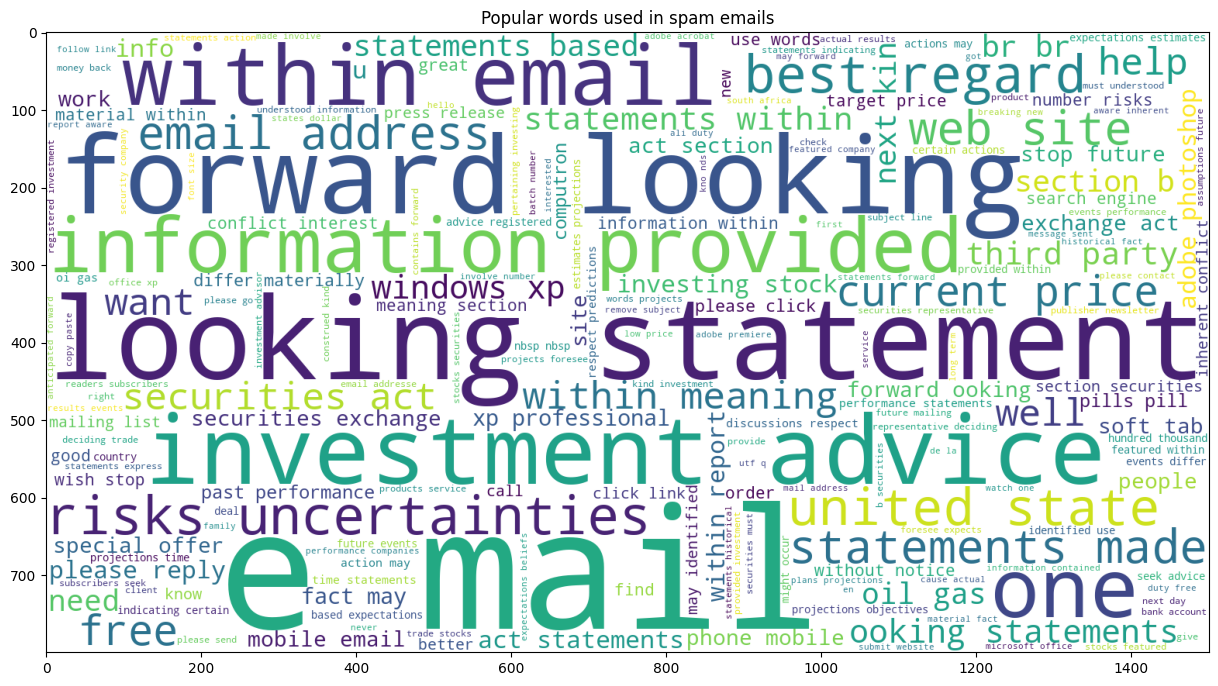

In [170]:
string_spam = ' '.join(spam_emails['cleaned_emails'])
spam_wc = wc.generate(text=string_spam)
plt.figure(figsize=(15,10))
plt.title('Popular words used in spam emails')
plt.imshow(spam_wc);

- Print popular words in ham emails

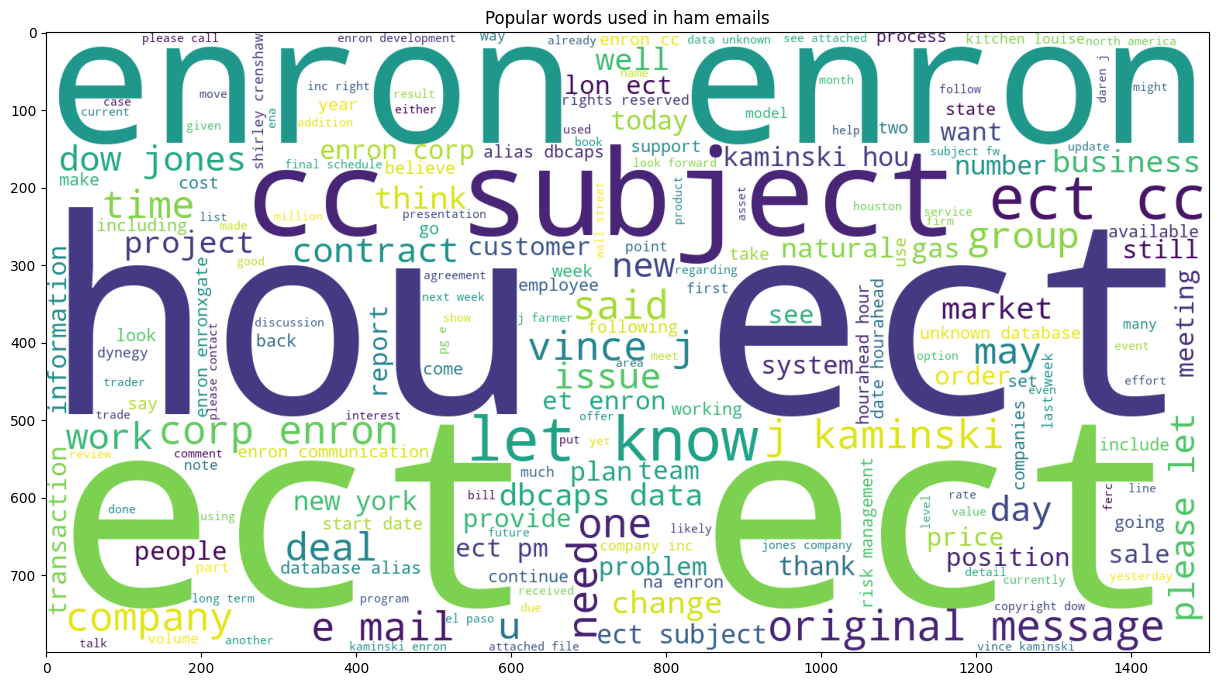

In [171]:
string_ham = ' '.join(ham_emails['cleaned_emails'])
ham_wc = wc.generate(text=string_ham)
plt.figure(figsize=(15,10))
plt.title('Popular words used in ham emails')
plt.imshow(ham_wc);

### Print the top 30 popular words in spam

In [172]:
from collections import defaultdict, Counter
spam_dict = defaultdict(int)
for email in spam_emails['cleaned_emails'][:10]:
    for word in email.split():
        spam_dict[word] +=1

spam_word_count= Counter(spam_dict)


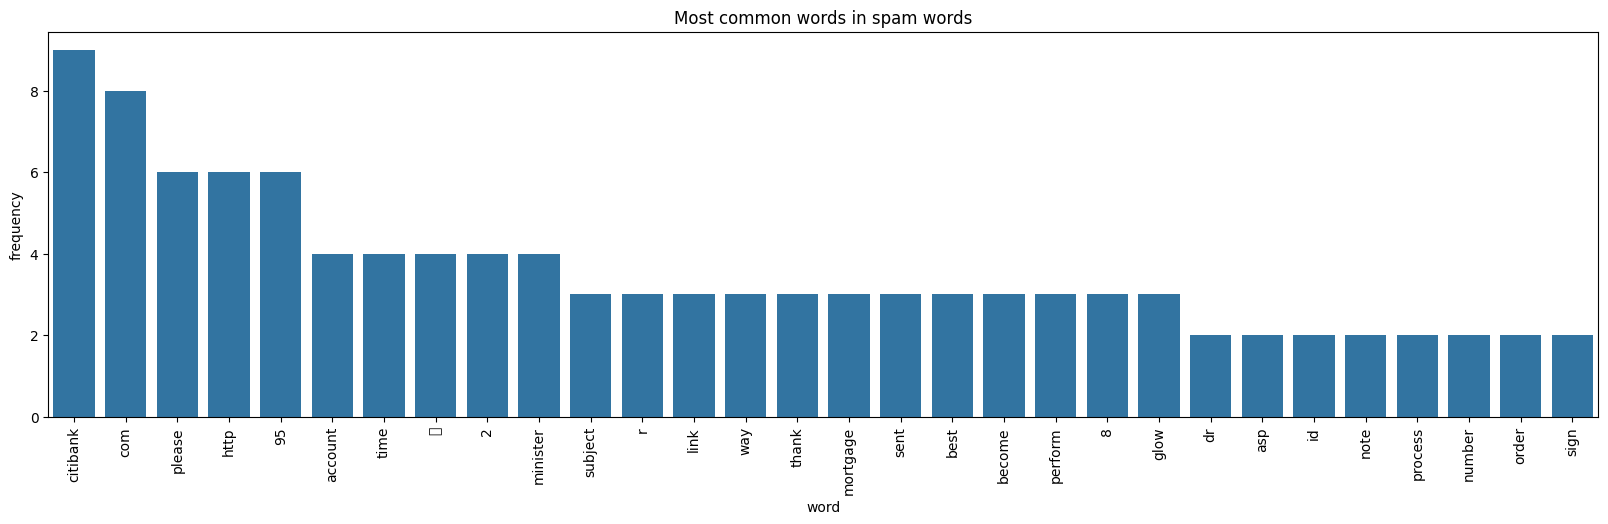

In [173]:
spam_df = pd.DataFrame(spam_word_count.most_common(30), columns=['word', 'frequency'])
plt.figure(figsize = (20,5))

sns.barplot(x='word',y='frequency', data=spam_df)
plt.xticks(rotation=90)
plt.title('Most common words in spam words')
plt.show();

### Print the top 30 popular words in ham

In [174]:
ham_dict = defaultdict(int)
for email in ham_emails['cleaned_emails']:
    for word in email.split():
        ham_dict[word] += 1
#create a counter 
ham_word_count = Counter(ham_dict)

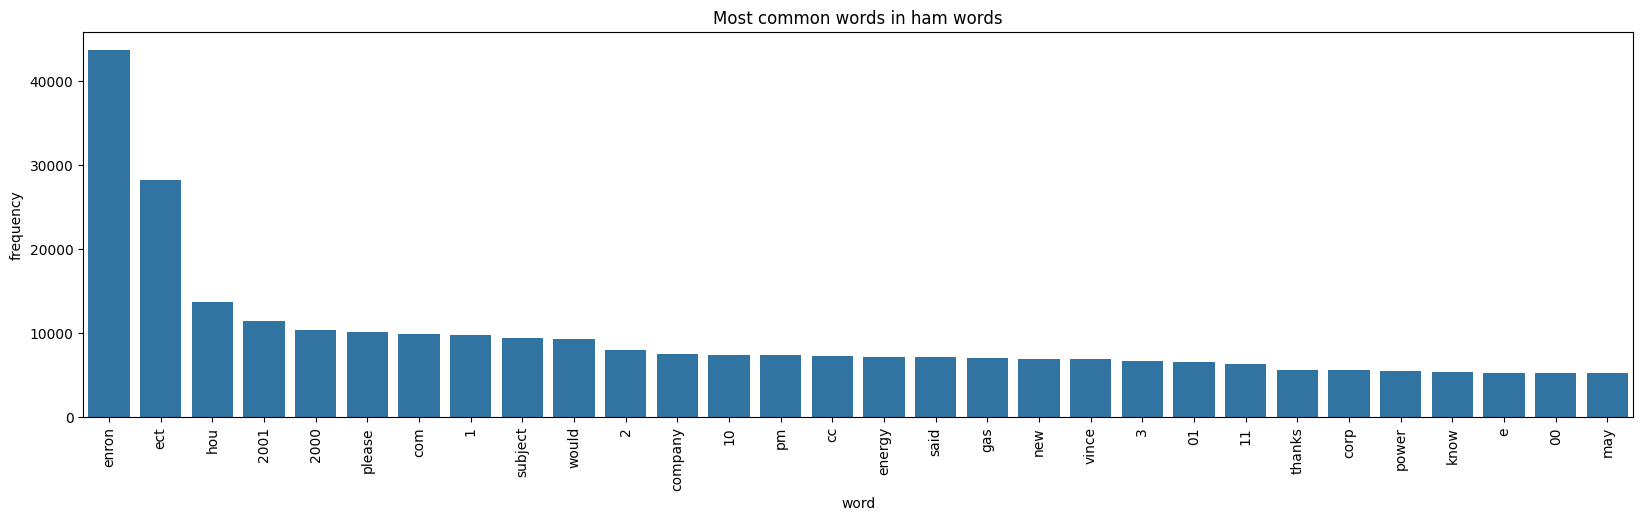

In [175]:
ham_df = pd.DataFrame(ham_word_count.most_common(30), columns=['word', 'frequency'])
plt.figure(figsize = (20,5))

sns.barplot(x='word',y='frequency', data=ham_df)
plt.xticks(rotation=90)
plt.title('Most common words in ham words')
plt.show();

- Save the data

In [176]:
emails.to_csv('data/cleaned_data.csv', index=False)